In [1]:
import dlsfunctions as dls
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter - 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [3]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [4]:
theta_input = np.append(f_1, beta)

In [5]:
simulated_data = dls.g2(theta_input, d, m, gamma, time_in)

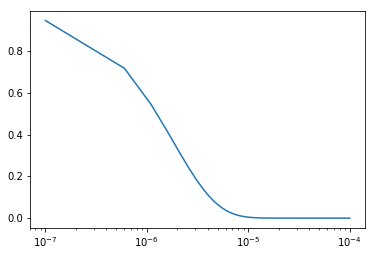

In [6]:
plt.semilogx(time_in, simulated_data)

In [45]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [46]:
start_pos = [theta_input + 1e-4*np.random.rand(ndim) for i in range(nwalkers)] 

In [47]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data, m, gamma, time_in))

In [44]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

emcee: Exception while calling your likelihood function:
  params: [9.93382362e+03 5.12036079e+07 1.77177954e+09 4.11663756e+08
 6.42245834e+05 2.44037763e+00 5.21173553e+00 2.01534679e+00
 1.08202206e+00 3.25984017e+00 9.76326271e-01 6.28119334e+00
 7.94858691e+00 1.20892284e+00 6.27503460e-01 2.40335287e+00
 2.54892376e+00 4.50787788e-01 4.14642146e+00 2.21296456e-01
 9.12759697e-01]
  args: (array([5.00000000e-10, 9.47368421e-10, 1.39473684e-09, 1.84210526e-09,
       2.28947368e-09, 2.73684211e-09, 3.18421053e-09, 3.63157895e-09,
       4.07894737e-09, 4.52631579e-09, 4.97368421e-09, 5.42105263e-09,
       5.86842105e-09, 6.31578947e-09, 6.76315789e-09, 7.21052632e-09,
       7.65789474e-09, 8.10526316e-09, 8.55263158e-09, 9.00000000e-09]), array([9.46239106e-01, 7.17252595e-01, 5.44008982e-01, 4.12857337e-01,
       3.13510164e-01, 2.38209447e-01, 1.81100845e-01, 1.37763711e-01,
       1.04857878e-01, 7.98580066e-02, 6.08536421e-02, 4.63986311e-02,
       3.53976332e-02, 2.7020533

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "dlsfunctions.py", line 120, in log_posterior
    return log_prior(theta, m) + log_likelihood(theta, d, y, m, gamma, time)
  File "dlsfunctions.py", line 107, in log_likelihood
    g2_result = g2(theta, d, m, gamma, time)
  File "dlsfunctions.py", line 72, in g2
    g2[i] = beta*sum_squared
KeyboardInterrupt


KeyboardInterrupt: 

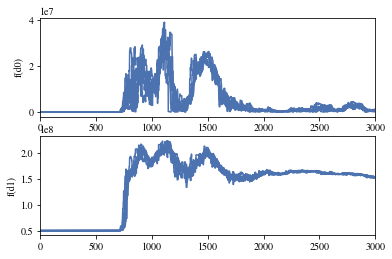

In [25]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

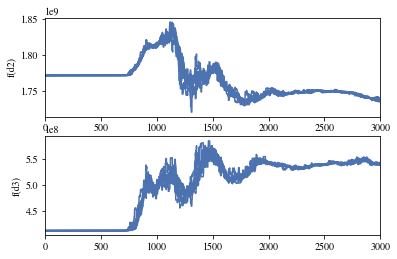

In [26]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

In [27]:
samples = sampler.chain[:,2800:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [28]:
q

,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,4.845364e+05,1.540580e+08,9.526902e+07,1.618244e+08,6.954079e+05,7.734113e+08,4.182561e+06,3.829384e+08,1.750896e+08,3.187518e+05,4.013495e+08,4.098938e+08,1.738416e+09,5.409364e+08,6.778406e+08,1.286659e+06,5.934152e+07,2.357091e+08,2.266746e+06,3.678146e+08
0.50,1.515825e+06,1.569627e+08,9.950920e+07,1.651785e+08,1.544369e+06,7.766407e+08,5.952635e+06,3.853022e+08,1.773029e+08,6.615978e+05,4.027104e+08,4.118948e+08,1.740755e+09,5.451780e+08,6.811100e+08,2.394627e+06,6.062032e+07,2.369535e+08,3.192254e+06,3.698927e+08
0.84,2.712314e+06,1.589899e+08,1.039788e+08,1.682012e+08,3.355724e+06,7.798447e+08,7.290712e+06,3.877914e+08,1.795695e+08,1.648039e+06,4.040518e+08,4.137192e+08,1.744018e+09,5.483307e+08,6.835914e+08,3.809312e+06,6.196222e+07,2.399112e+08,4.217938e+06,3.715892e+08


In [30]:
q_50 = q.quantile([0.5], axis=0)

In [15]:
infer_d = np.zeros(20)
infer_d[0] = 2.454e6
infer_d[1] = 2.183e7
infer_d[2] = 1.7517e9
infer_d[3] = 3.5328e8
infer_d[4] = 8.0862e6
infer_d[5] = 4.734e7
infer_d[6] = 2.703e6
infer_d[7] = 5.024e7
infer_d[8] = 5.197e7
infer_d[9] = 9.448e5
infer_d[10] = 1.62e7
infer_d[11] = 1.1022e7
infer_d[12] = 6.62e6
infer_d[13] = 3.54e7
infer_d[14] = 2.603e7
infer_d[15] = 3.33e7
infer_d[16] = 4.28e7
infer_d[17] = 5.67e5
infer_d[18] = 1.418e7
infer_d[19] = 7.883e6

In [39]:
infer_d = q_50.values
infer_d = infer_d.flatten(order='C')
infer_d.shape

(20,)

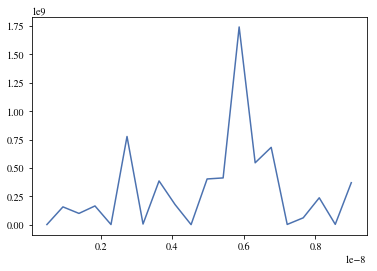

In [40]:
plt.plot(d, infer_d)

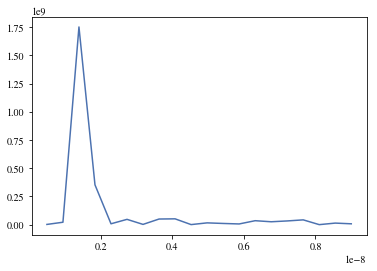

In [16]:
plt.plot(d, infer_d)